In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics
%matplotlib inline

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data = data.drop(["Glucose", "SkinThickness", "DiabetesPedigreeFunction", "BloodPressure"], axis=1)
data.head()

,Pregnancies,Insulin,BMI,Age,Outcome
0,6,0,33.6,50,1
1,1,0,26.6,31,0
2,8,0,23.3,32,1
3,1,94,28.1,21,0
4,0,168,43.1,33,1


In [5]:
X = data.drop("Outcome", axis=1)
Y = data["Outcome"]

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [7]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(576, 4)
(192, 4)
(576,)
(192,)


In [8]:
model = LogisticRegression()

In [9]:
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

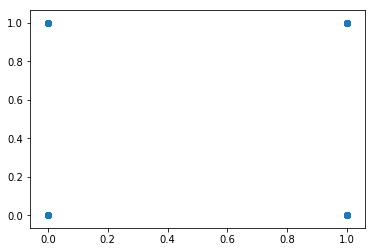

In [10]:
Y_pred = model.predict(X_test)
plt.scatter(Y_test, Y_pred)

In [36]:
arr = confusion_matrix(Y_test, Y_pred)
arr

array([[118,  12],
       [ 47,  15]])

In [12]:
Y_test.value_counts()

0    130
1     62
Name: Outcome, dtype: int64

In [52]:
TN = arr[0][0]
FP = arr[0][1]
FN = arr[1][0]
TP = arr[1][1]

accuracy = (TP + TN) / (TP + FP + FN + TN)
error = (FP + FN) / (TP + FP + FN + TN)
recall = TP / (TP + FN)
precision = TP / (FP + TP)
specificity = TN / (TN + FP)
print('accuracy:', accuracy, '\nerror:', error, '\nrecall:', recall, '\nprecision:', precision, '\nspecificity:', specificity)

accuracy: 0.692708333333 
error: 0.307291666667 
recall: 0.241935483871 
precision: 0.555555555556 
specificity: 0.907692307692


In [66]:
trueAcc = metrics.accuracy_score(Y_test, Y_pred)
truePrec = metrics.precision_score(Y_test, Y_pred)
trueRecall = metrics.recall_score(Y_test, Y_pred)
f1_score = metrics.f1_score(Y_test, Y_pred)
true_error = metrics.brier_score_loss(Y_test, Y_pred)

print('\n', trueAcc, '\n', true_error, '\n', trueRecall, '\n', truePrec, '\n', f1_score)


 0.692708333333 
 0.307291666667 
 0.241935483871 
 0.555555555556 
 0.337078651685


In [67]:
model.predict_proba(X_test)

array([[ 0.63247571,  0.36752429],
       [ 0.71643656,  0.28356344],
       [ 0.71104114,  0.28895886],
       [ 0.5858938 ,  0.4141062 ],
       [ 0.84103973,  0.15896027],
       [ 0.82934844,  0.17065156],
       [ 0.50110974,  0.49889026],
       [ 0.48658459,  0.51341541],
       [ 0.72321388,  0.27678612],
       [ 0.32810562,  0.67189438],
       [ 0.64244443,  0.35755557],
       [ 0.25912035,  0.74087965],
       [ 0.63949765,  0.36050235],
       [ 0.76987637,  0.23012363],
       [ 0.57345769,  0.42654231],
       [ 0.80896485,  0.19103515],
       [ 0.54236399,  0.45763601],
       [ 0.8809859 ,  0.1190141 ],
       [ 0.56071047,  0.43928953],
       [ 0.63038849,  0.36961151],
       [ 0.55812011,  0.44187989],
       [ 0.62388338,  0.37611662],
       [ 0.80183978,  0.19816022],
       [ 0.58322696,  0.41677304],
       [ 0.84451719,  0.15548281],
       [ 0.7468329 ,  0.2531671 ],
       [ 0.90256923,  0.09743077],
       [ 0.30366288,  0.69633712],
       [ 0.84641691,